# LINEAR REGRESSION

## Data

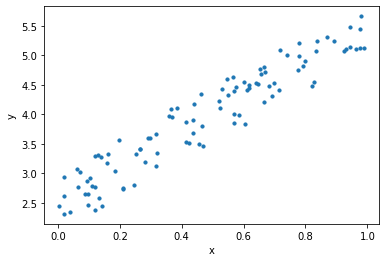

In [2]:
# imports
import numpy as np
import matplotlib.pyplot as plt

# generate random data-set
np.random.seed(0)
x = np.random.rand(100, 1)
y = 2 + 3 * x + np.random.rand(100, 1)

# plot
plt.scatter(x,y,s=10)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Model from Scratch ( Without Library )

In [3]:
# imports
import numpy as np


class LinearRegressionUsingGD:
    """Linear Regression Using Gradient Descent.
    Parameters
    ----------
    eta : float
        Learning rate
    n_iterations : int
        No of passes over the training set
    Attributes
    ----------
    w_ : weights/ after fitting the model
    cost_ : total error of the model after each iteration
    """

    def __init__(self, eta=0.05, n_iterations=1000):
        self.eta = eta
        self.n_iterations = n_iterations

    def fit(self, x, y):
        """Fit the training data
        Parameters
        ----------
        x : array-like, shape = [n_samples, n_features]
            Training samples
        y : array-like, shape = [n_samples, n_target_values]
            Target values
        Returns
        -------
        self : object
        """

        self.cost_ = []
        self.w_ = np.zeros((x.shape[1], 1))
        m = x.shape[0]

        for i in range(self.n_iterations):
            y_pred = np.dot(x, self.w_)
            residuals = y_pred - y
            gradient_vector = np.dot(x.T, residuals)
            self.w_ -= (self.eta / m) * gradient_vector
            cost = np.sum((residuals ** 2)) / (2 * m)
            self.cost_.append(cost)
            # mean squared error
            mse = np.sum((y_pred - y_actual)**2)
            # root mean squared error
            # m is the number of training examples
            rmse = np.sqrt(mse/m)
            print('Iteration '+i+' : ',cost,mse,rmse)
            
        return self

    def predict(self, x):
        """ Predicts the value after the model has been trained.
        Parameters
        ----------
        x : array-like, shape = [n_samples, n_features]
            Test samples
        Returns
        -------
        Predicted value
        """
        return np.dot(x, self.w_)

In [10]:
obj = LinearRegressionUsingGD()
obj.fit(x,y)
obj.predict(0.5)

array([[3.44029061]])

## Model Implementation ( Scikit Learn)

Slope: [[2.93655106]]
Intercept: [2.55808002]
Root mean squared error:  0.07623324582875007
R2 score:  0.9038655568672764


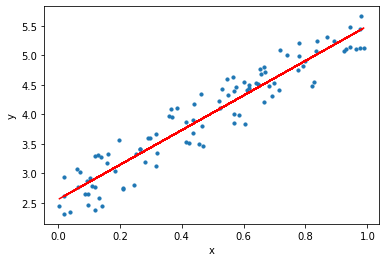

In [6]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# generate random data-set
np.random.seed(0)
x = np.random.rand(100, 1)
y = 2 + 3 * x + np.random.rand(100, 1)

# sckit-learn implementation

# Model initialization
regression_model = LinearRegression()
# Fit the data(train the model)
regression_model.fit(x, y)
# Predict
y_predicted = regression_model.predict(x)

# model evaluation
rmse = mean_squared_error(y, y_predicted)
r2 = r2_score(y, y_predicted)

# printing values
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

# plotting values

# data points
plt.scatter(x, y, s=10)
plt.xlabel('x')
plt.ylabel('y')

# predicted values
plt.plot(x, y_predicted, color='r')
plt.show()